<a href="https://colab.research.google.com/github/DenysUdud/HMH/blob/master/LA21_Lab_1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

## Intro

1. Submit this task as a link to Google Colab (https://colab.research.google.com/notebooks/intro.ipynb#). Make sure you made a copy of this notebook. Another option is a fully rendered Jupyter Notebook on private repository in (Github / Gitlab) and adding TAs as collaborators. 

2. You are allowed to use ***only*** cv2 standard methods for reading and resizing image; warpAffine transformation; matplotlib or cv2 imshow function for display and numpy operations.

3. Form teams of 2-3 people and make only one submission per team. Mention all teammates in the name of the notebook.

4. Your final grade will be a product of grade for the coding and explanatory part and coefficient for the oral defense (to be scheduled later).


Recall that a linear transformation is a mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ such that
$\forall c_1, c_2 \in \mathbb{R}, \mathbf{u}_1, \mathbf{u}_2 \in \mathbb{R}^n$  
$T(c_1 \mathbf{u}_1 + c_2 \mathbf{u}_2) = c_1T(\mathbf{u}_1) + c_2T(\mathbf{u}_2)$.  

In this lab you will study some of the common transformations in $\mathbb{R}^2$, derive their general matrix form, explain what a resulting image will look like and apply transformations to the pictures.


Each linear transformation can be represented as a matrix. In case of an image linear transformation is applied to a pixel position on xy-plane, transforming its coordinates $(x, y)$ to $(x', y')$, but retaining the color. However, the image is usually represented as an array of pixels, thus having dimensions (image height, image width, 3) if color is represented in RGB system. You can use *warpAffine()* function from cv2 or implement a function that manipulates pixel's position given an array of pixels and a transformation matrix yourself.

Load the first image, resize it to more convenient size and examine its representation. What is its shape? What do the values mean?

In [ ]:
# Load images
img1_path = ''
image = cv.imread(img1_path)
resized = cv.resize(image, (500,500))

## Rotation matrix

Rotation is a linear transformation that preseves at least one point. An example of rotation by angle $\phi$ on xy-plane is depicted in the image below:   
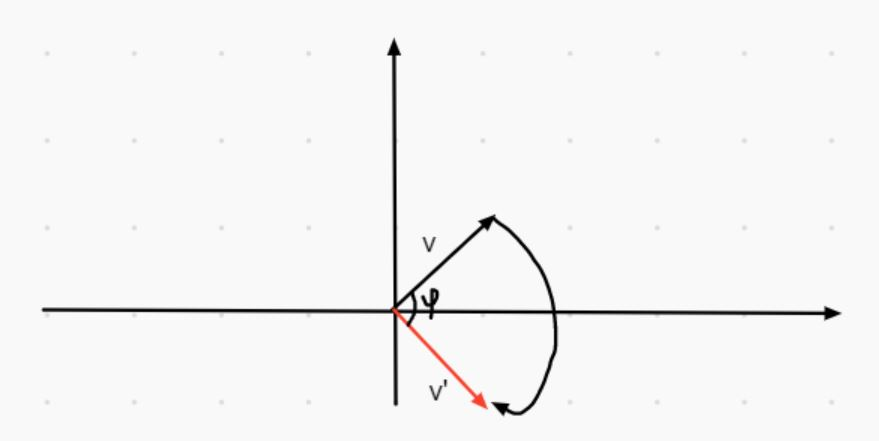


What is the rotation matrix by a generic angle $\phi$?
Implement a function that calculates rotation matrix and apply it to the image to rotate it by $45^\circ$

In [ ]:
def get_rotation_matrix(phi):
  transformation_matrix = np.zeros((2,3))
  return transformation_matrix

M = get_rotation_matrix(phi)

In [ ]:
rotated = cv.warpAffine(resized, M, (500, 500),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
cv2_imshow(rotated)

## Scaling matrix

Scaling is a tranformation that enlarges or diminishes objects by a factor. For scaling in 2D space a factor can be represented as a vector $(x_s, y_s)$ where $x_s$ and $y_s$ are scaling factors for each respective axis and they don't have to be equal.On the picture v'' represents vector v scaled by a factor (0.5, 0.5) and v' - by (1, 0.5).
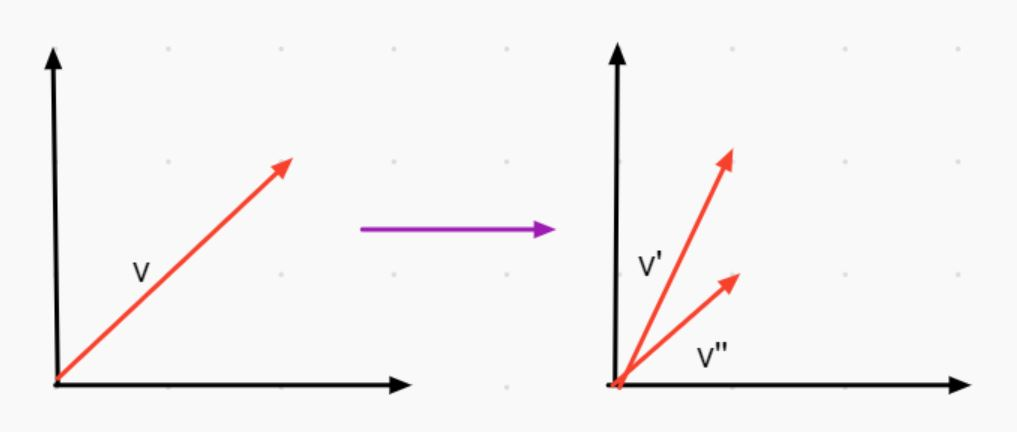


Derive a general form for a translation matrix and apply scaling by a factor of (1, 0.5) to the image.

In [ ]:
def get_scaling_matrix(scale_factor_x, scale_factor_y):
  return np.zeros([(2,3)])

M2 = get_scaling_matrix()

In [ ]:
scaled = # apply transformation
cv2_imshow(scaled)

## Shear matrix

Horizontal shearing moves each point in a fixed direction by distance proportional to y-coordinate of the point. Shear map changes angles and lengthes of line segments. You will ween to find a transformation matrix that moves point (x, y) to (x+1.5y, y) and apply it to the image. 

In [ ]:
def get_horizontal_shear_matrix(factor):
  return np.zeros((2, 3))

M3 = get_horizontal_shear_matrix()
sheared = # apply transformation
cv2_imshow(sheared)

## Translation matrix

Translation is a transformation that moves every point of a figure by fixed distance. Implement a function that produces translation matrix and apply to the image translation by (20, 25).


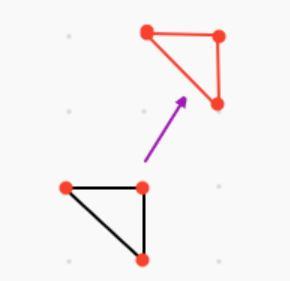



In [ ]:
def get_translation_matrix(translation_factor_x, translation_factor_y):
  return np.zeros((2, 3))

M4 = get_translation_matrix()

translated = # apply transformation
cv2_imshow(translated)

## Mirror symmetry 
Vertical mirror symmetry maps coordinates $(x, y)$ to $(-x,y)$. Implement a function that produces transformation matrix that represents vertical mirror symmetry.

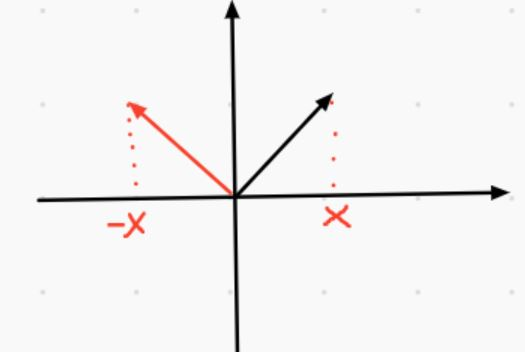


In [ ]:
def get_horizontal_mirror_marix():
  return np.zeros((2,3))

M5 = get_horizontal_mirror_marix()

mirrored = # apply transformation
cv2_imshow(mirrored)

# Perspective shift matrix
You will need to use img2.jpg for this task. Load and resize it in the similar manner as with img1.

The main goal of perspective transformation (or perspective rectification) is to synthesize a perspective-free view of an object given a photo taken at an angle.   
To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image (3 of these points should not be colinear). Transformation matrix is a 3 by 3 matrix that satisfies the following equation, where ($x_i$, $y_i$) is the source vector and ($u_i$, $v_i$) is  the destination vector. 

$u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c_{22}}$

$v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}}$

Find coefficients $c_{ij}$ via solving linear system containing source and destination coordinates and 9 'c' coefficients with numpy methods and apply it to an image so that the sign is clearly visible. Explain how the system was constructed.

(Hint: $c_{22} = 1$)


In [ ]:
def get_perspective_transform_matrix(source, destination):
    return np.zeros((3,3))

rows,cols,ch = img2_resized.shape

source_points = np.float32([])
destination_points = np.float32([])

perspective_shift_m = get_perspective_transform_matrix(source_points, destination_points)

transformed = cv.warpPerspective(# args)
# plot source and transformed images side by side

## Composition of transformations

Apply following transformations in specified order to the original image  and show the results side-by-side   
1) Scaling by $(1.5, 2)$, rotation by $18^\circ$ and translation by $(10, 15)$.  
2) Translation by $(10, 15)$, scaling by $(1.5, 2)$, rotation by $18^\circ$.  
Is result the same? Is it possible to obtain same/d
ifferent result changing the order of transformations.

## Summary 
Think of the answers to the folllowing questions:  
What is a transformation matrix?  
How its shape and values affect the resulting image? 
What is a shape of a typical transformation matrix that is applied to images?  
What can be a result of composition of transformations?  
What is a perspective shift transformation in terms of geometry?
